# Модель наблюдателя  

In [3]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

from scipy.integrate import odeint

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

# Лабораторная работа

### Модель наблюдателя

#### Случай, когда вектор состояния представляет собой (x,y,vx,vy) и скорость нулевая

In [104]:
time = 0.
tau = 0.1
ntime = 100

Xt = np.zeros (ntime)
Yt = np.zeros (ntime)
Vtx = np.zeros (ntime)
Vty = np.zeros (ntime)
Vex = np.zeros (ntime)
Vey = np.zeros (ntime)



Xmeasured = np.zeros (ntime)
Ymeasured = np.zeros (ntime)
Xexact = np.zeros (ntime)
Yexact = np.zeros (ntime)
Xtt = np.zeros (ntime)



x = 0.
vx = 0.
y = 0.
vy = 0.

xe = 0.
ye = 0.


Z = np.zeros((4,1))
Z[0] = x
Z[1] = y
Z[2]= vx
Z[3]= vy

P = np.zeros ((4,4)) # диагональная матрица ошибок наблюдений


Phi = np.eye (4) # ковариационна матрица перехода
Phi[0,2] = tau
Phi[1,3] = tau

disp = 0.000000001        # дисперсия  в модели движения 
G = np.eye(4)*disp 

disp_mes = 0.0001
R = np.eye(4)*disp_mes  # дисперсия ошибок наблюдений
Rinv = np.linalg.inv(R)
P = R
Pini = P 

E = np.eye(4)

In [105]:
def f(x, y, vx, vy):
    return np.array([x, y, vx, vy]).reshape(4,1)

Text(0.5, 1.0, 'Скорость по Y')

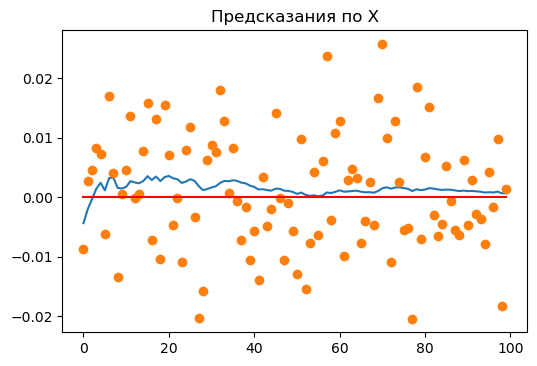

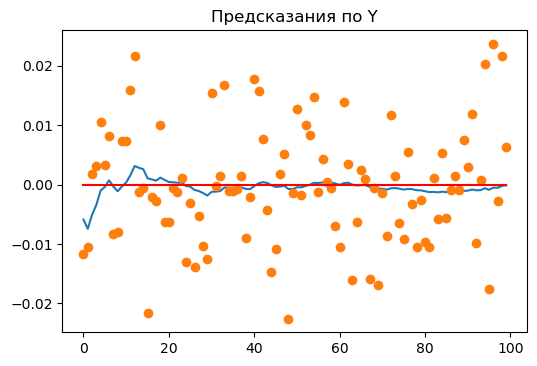

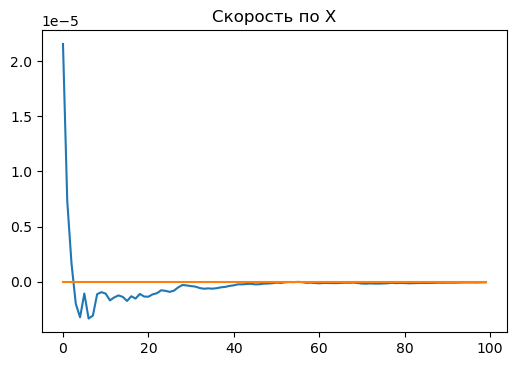

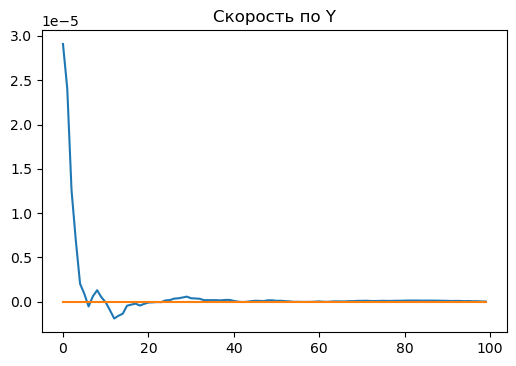

In [106]:
for k in range (0,ntime):

    vx = 0.0*np.sin(2.*np.pi*k/ntime)
    vy = 0.0*np.cos(2.*np.pi*k/ntime) # cos ??

    x_cur_exact = xe + vx*tau
    y_cur_exact = ye + vy*tau

    x_cur_mes = x_cur_exact + 0.01 * np.random.normal()
    y_cur_mes = y_cur_exact + 0.01 * np.random.normal()
    
#     if (k==ntime/2):
#         P = Pini # улучшает предсказания при движущемся объекте

    Zp = Phi@Z # предсказанный вектор состояния (предыдущий вектор умноженный на матрицу перехода фи) вектор 4*1
    
    Pp = Phi@P@Phi.T + Phi@G@Phi.T # Pp предсказанная ков матрица ошибок измерения вектора состояния
    P = np.dot(Pp, R)*np.linalg.inv(Pp+R)
    Z = Zp + np.dot(np.dot(P, Rinv),(f(x_cur_mes, y_cur_mes, vx, vy)-Zp))



    Xt[k]=Z[0] # предсказанная оценка составляющего вектора состояния по X
    Yt[k]=Z[1] # предсказанная оценка составляющего вектора состояния по Y
    Vtx[k]=Z[2]# предсказанная оценка составляющего вектора состояния по Vx
    Vty[k]=Z[3]# предсказанная оценка составляющего вектора состояния по Vy
    Xmeasured[k]=x_cur_mes
    Ymeasured[k]=y_cur_mes
    Xexact[k]=x_cur_exact
    Yexact[k]=y_cur_exact
    Vex[k]=vx
    Vey[k]=vy

    
plt.plot (Xt)
plt.plot (Xmeasured, 'o') # x который мы получили после измерения (зашумленный реальный)
plt.plot (Xexact, color = 'red') # реальный x
plt.title('Предсказания по X')

plt.figure()
plt.plot (Yt)
plt.plot (Ymeasured, 'o') 
plt.plot (Yexact, color = 'red')
plt.title('Предсказания по Y')

plt.figure()
plt.plot (Vtx) # скорость
plt.plot (Vex) # 
plt.title('Скорость по X')

plt.figure()
plt.plot (Vty) # скорость
plt.plot (Vey) # 
plt.title('Скорость по Y')


In [132]:
#### Случай, когда вектор состояния представляет собой (x,y,vx,vy) и скорость ненулевая

In [122]:
time = 0.
tau = 0.1
ntime = 100

Xt = np.zeros (ntime)
Yt = np.zeros (ntime)
Vtx = np.zeros (ntime)
Vty = np.zeros (ntime)
Vex = np.zeros (ntime)
Vey = np.zeros (ntime)



Xmeasured = np.zeros (ntime)
Ymeasured = np.zeros (ntime)
Xexact = np.zeros (ntime)
Yexact = np.zeros (ntime)
Xtt = np.zeros (ntime)



x = 0.
vx = 0.
y = 0.
vy = 0.

xe = 0.
ye = 0.


Z = np.zeros((4,1))
Z[0] = x
Z[1] = y
Z[2]= vx
Z[3]= vy

P = np.zeros ((4,4)) # диагональная матрица ошибок наблюдений

r = 0.99        # коэффициент корреляции в модели движения
Phi = np.array([[r, 0, 0, 0], [0, r, 0, 0], [0, 0, r, 0], [0, 0, 0, r]])
#Phi = np.eye (4) # ковариационна матрица перехода
# Phi[0,2] = tau
# Phi[1,3] = tau

disp = 0.0000001        # дисперсия  в модели движения 
G = np.eye(4)*disp 

disp_mes = 0.0001
R = np.eye(4)*disp_mes  # дисперсия ошибок наблюдений
Rinv = np.linalg.inv(R)
P = R
Pini = P 

E = np.eye(4)

Text(0.5, 1.0, 'Скорость по Y')

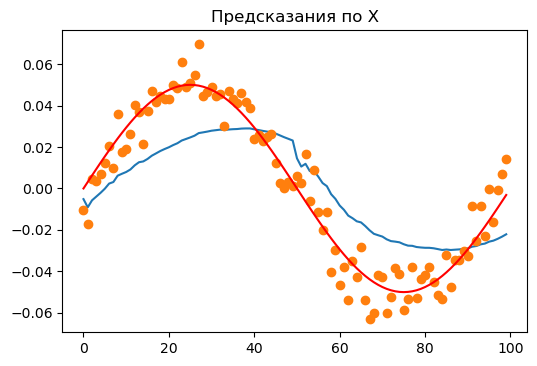

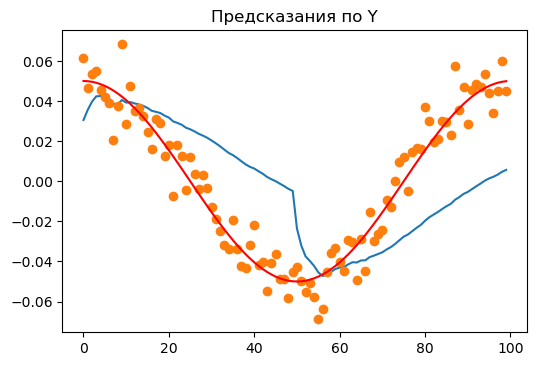

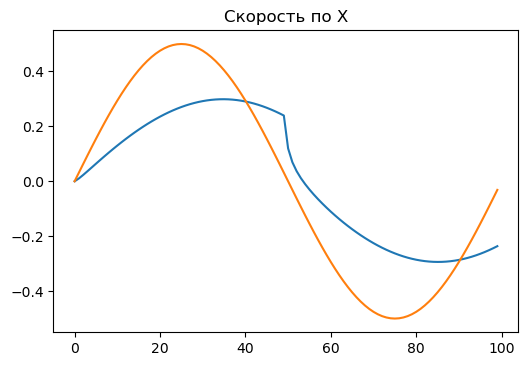

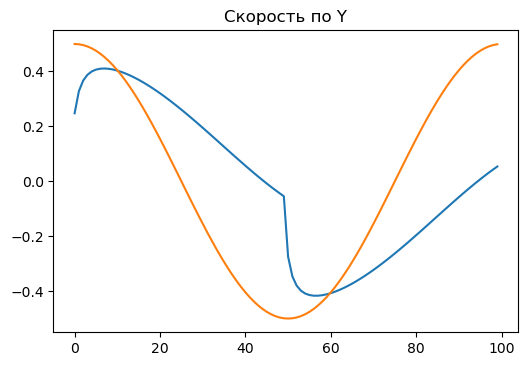

In [123]:
for k in range (0,ntime):

    vx = 0.5*np.sin(2.*np.pi*k/ntime)
    vy = 0.5*np.cos(2.*np.pi*k/ntime) # cos ??
    x_cur_exact = xe + vx*tau
    y_cur_exact = ye + vy*tau

    x_cur_mes = x_cur_exact + 0.01 * np.random.normal()
    y_cur_mes = y_cur_exact + 0.01 * np.random.normal()
    
    if (k==ntime/2):
        P = Pini # улучшает предсказания при движущемся объекте

    Zp = Phi@Z # предсказанный вектор состояния (предыдущий вектор умноженный на матрицу перехода фи) вектор 4*1
    
    Pp = Phi@P@Phi.T + Phi@G@Phi.T # Pp предсказанная ков матрица ошибок измерения вектора состояния
    P = np.dot(Pp, R)*np.linalg.inv(Pp+R)
    Z = Zp + np.dot(np.dot(P, Rinv),(f(x_cur_mes, y_cur_mes, vx, vy)-Zp))



    Xt[k]=Z[0] # предсказанная оценка составляющего вектора состояния по X
    Yt[k]=Z[1] # предсказанная оценка составляющего вектора состояния по Y
    Vtx[k]=Z[2]# предсказанная оценка составляющего вектора состояния по Vx
    Vty[k]=Z[3]# предсказанная оценка составляющего вектора состояния по Vy
    Xmeasured[k]=x_cur_mes
    Ymeasured[k]=y_cur_mes
    Xexact[k]=x_cur_exact
    Yexact[k]=y_cur_exact
    Vex[k]=vx
    Vey[k]=vy

    
plt.plot (Xt)
plt.plot (Xmeasured, 'o') # x который мы получили после измерения (зашумленный реальный)
plt.plot (Xexact, color = 'red') # реальный x
plt.title('Предсказания по X')

plt.figure()
plt.plot (Yt)
plt.plot (Ymeasured, 'o') 
plt.plot (Yexact, color = 'red')
plt.title('Предсказания по Y')

plt.figure()
plt.plot (Vtx) # скорость
plt.plot (Vex) # 
plt.title('Скорость по X')

plt.figure()
plt.plot (Vty) # скорость
plt.plot (Vey) # 
plt.title('Скорость по Y')


#### Пример, разобранный на на занятии (вектор состояния есть (x,vx))

50


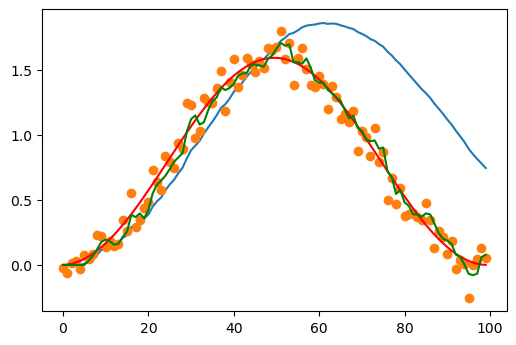

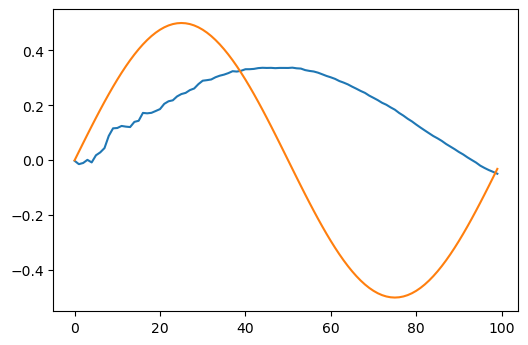

In [162]:
time = 0.
tau = 0.1
ntime = 100

Xt = np.zeros (ntime)
Vt = np.zeros (ntime)
Ve = np.zeros (ntime)
Xmeasured = np.zeros (ntime)
Xexact = np.zeros (ntime)
Xtt = np.zeros (ntime)

sigma_x = 0.01
sigma_v = sigma_x/tau

disp_mes = 0.01
disp = 0.000001 # отвечает за гладкость

x = 0.
v = 0.

xe = 0.

Z = np.zeros((2,1))
#Z.reshape((2,1))
Z[0] = x
Z[1] = v

P = np.zeros ((2,2))
P[0,0] = sigma_x**2
P[1,1] = sigma_v**2

Pini = P

Phi = np.eye (2)
Phi[0,1] = tau

G = np.zeros ((2,2))
G [1,1] = disp

H = np.zeros((1,2))

H[0,0] = 1; H[0,1] = 0.
#H.reshape((1,2))

R = np.eye(1)
R[0,0]=disp_mes

E = np.eye(2)

for k in range (0,ntime):
    v = 0.5*np.sin(2.*np.pi*k/ntime) # скорость. = 0 значит мы стоим реальная скорость
    xe = xe + v*tau # реальный x
    x = xe + 0.1 * np.random.normal() # x который мы получили по измерительным приборам ( xe + с шумом )
    
    if (k==ntime/2):
        #P = Pini # улучшает предсказания при движущемся объекте
        print (k)
    
    
    
    Zp = Phi@Z # предсказанный вектор состояния (предыдущий вектор умноженный на матрицу перехода фи)
    Pp = Phi@P@Phi.T + Phi@G@Phi.T # Pp предсказанная ков матрица ошибок измерения вектора состояния
    
    W = H@Pp@H.T
    K = Pp.T@H.T*np.linalg.inv(W+R) # рассчитанный коэффициент Каплана
    
    Z = Zp + K*(x-Zp[0]) # полученная оценка вектора состояния после корректировки на ошибку

    #print (K.T)
        
    P = (E-np.outer(K,H))@Pp@(E-np.outer(K,H)).T+K@K.T*R
    
    Xt[k]=Z[0] # предсказанная оценка составляющего вектора состояния по X
    Vt[k]=Z[1]# предсказанная оценка составляющего вектора состояния по Vx
    Xmeasured[k]=x
    Xexact[k]=xe
    Ve[k]=v
    
    if (k>5): # авторегрессия скользящегос креднегь
        Xtt[k]=1./3.*(Xmeasured[k-0]+Xmeasured[k-1]+Xmeasured[k-2])
    
plt.plot (Xt) # предсказанный X с помощью динамического уравнения (пытаемся очистить Xmeasured от шум и предсказать)
plt.plot (Xmeasured, 'o') # x который мы получили после измерения (зашумленный реальный)
plt.plot (Xexact, color = 'red') # реальный x
plt.plot (Xtt, color = 'green') # предсказанный по аторегрессии
plt.figure()
plt.plot (Vt) # скорость
plt.plot (Ve) # 
    
    
    


зеленая линия - авторегрессия скользящего среднего
синяя - предсказания по динамическому уровнению
оранжевый - это зашумленный сигнал

ve - точная скорость,на втором графике оранжевая
синяя на втором графике - предсказанная скорость

